## AQL Prediction Model using Python

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('air quality data.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [6]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [7]:
#num of rows and col
df.shape

(29531, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
#for duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Length: 29531, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [11]:
#drop rows whose AQI missing value
df.dropna(subset=['AQI'],inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [13]:
df.shape

(24850, 16)

In [14]:
#summary of data set
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [17]:
#% of null value
null_values_percentage= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

## Visualization

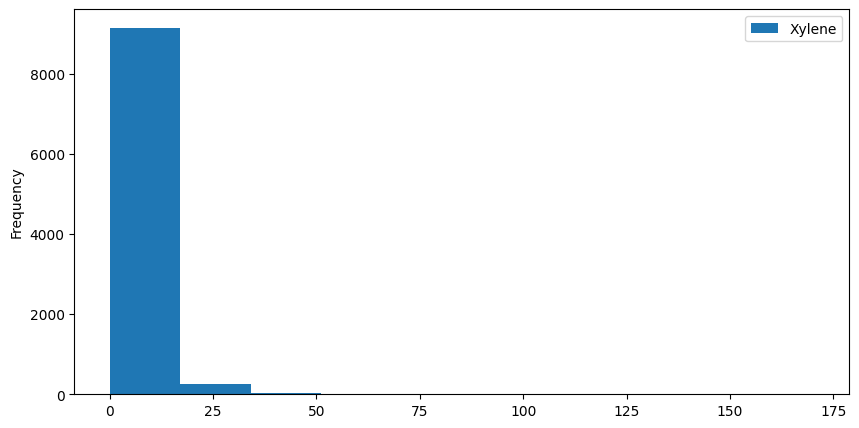

In [18]:
df['Xylene'].plot(kind = 'hist',figsize=(10,5))
plt.legend()
plt.show()

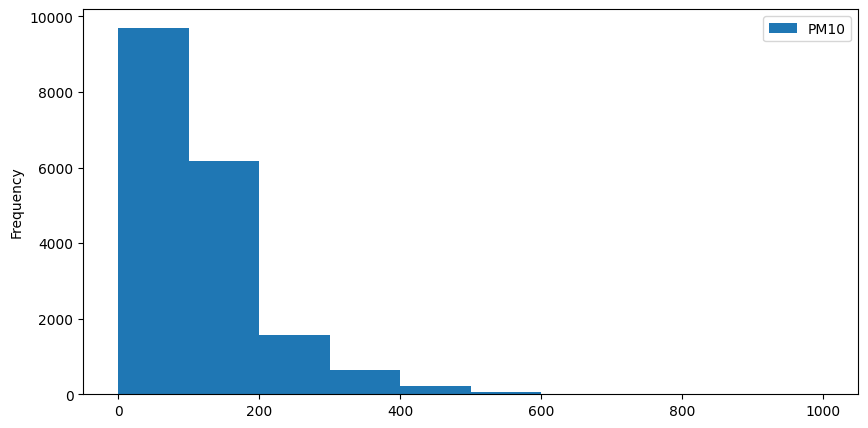

In [22]:
df['PM10'].plot(kind = 'hist',figsize=(10,5))
plt.legend()
plt.show()

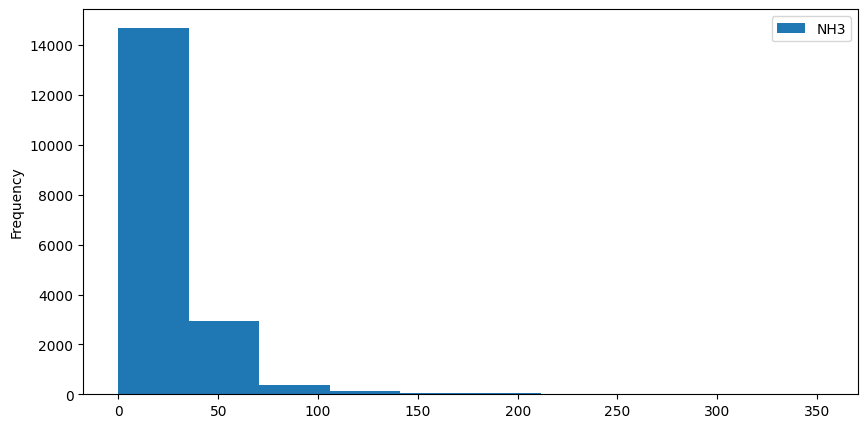

In [19]:
df['NH3'].plot(kind = 'hist',figsize=(10,5))
plt.legend()
plt.show()

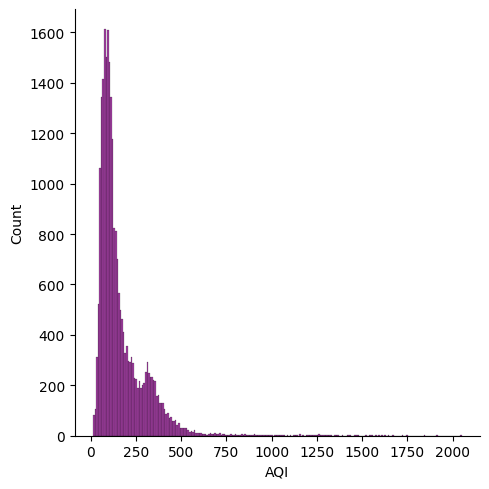

In [22]:
sns.displot(df, x='AQI',color='purple')
plt.show()

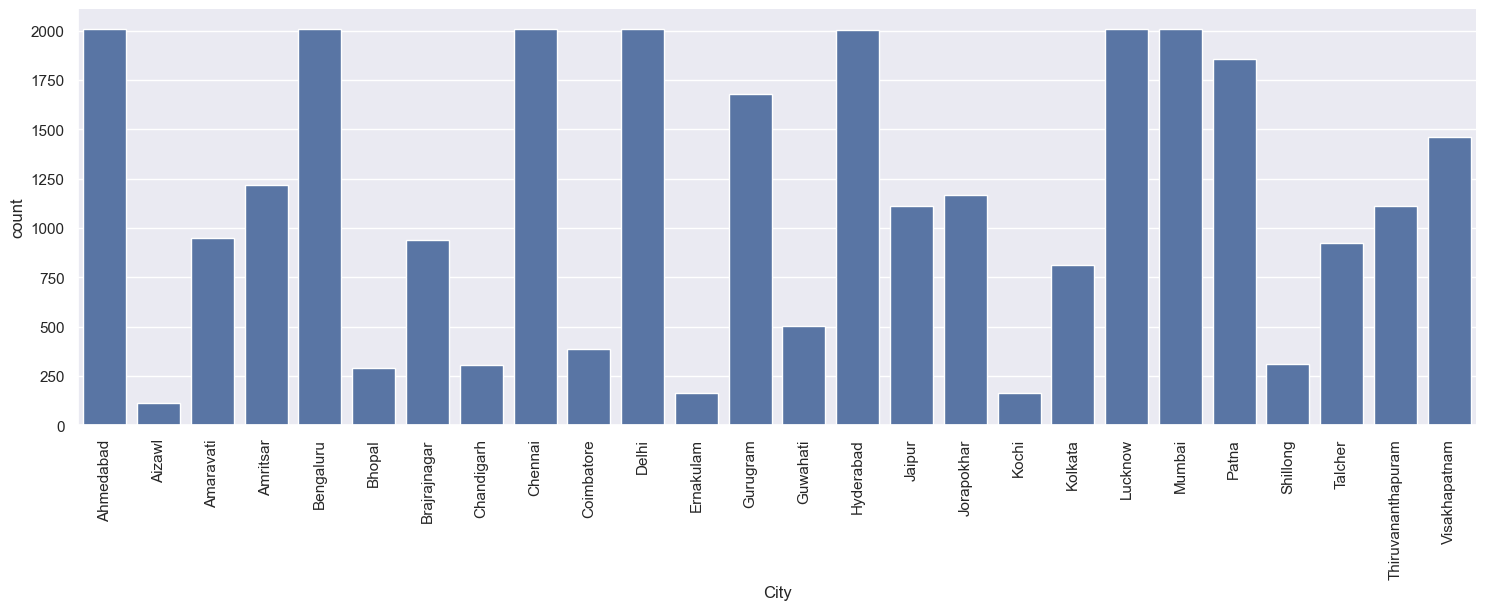

In [26]:
sns.set_theme(style="darkgrid")
graph=sns.catplot( x="City", kind='count', data=df,height=5, aspect=3)
graph.set_xticklabels(rotation=90)

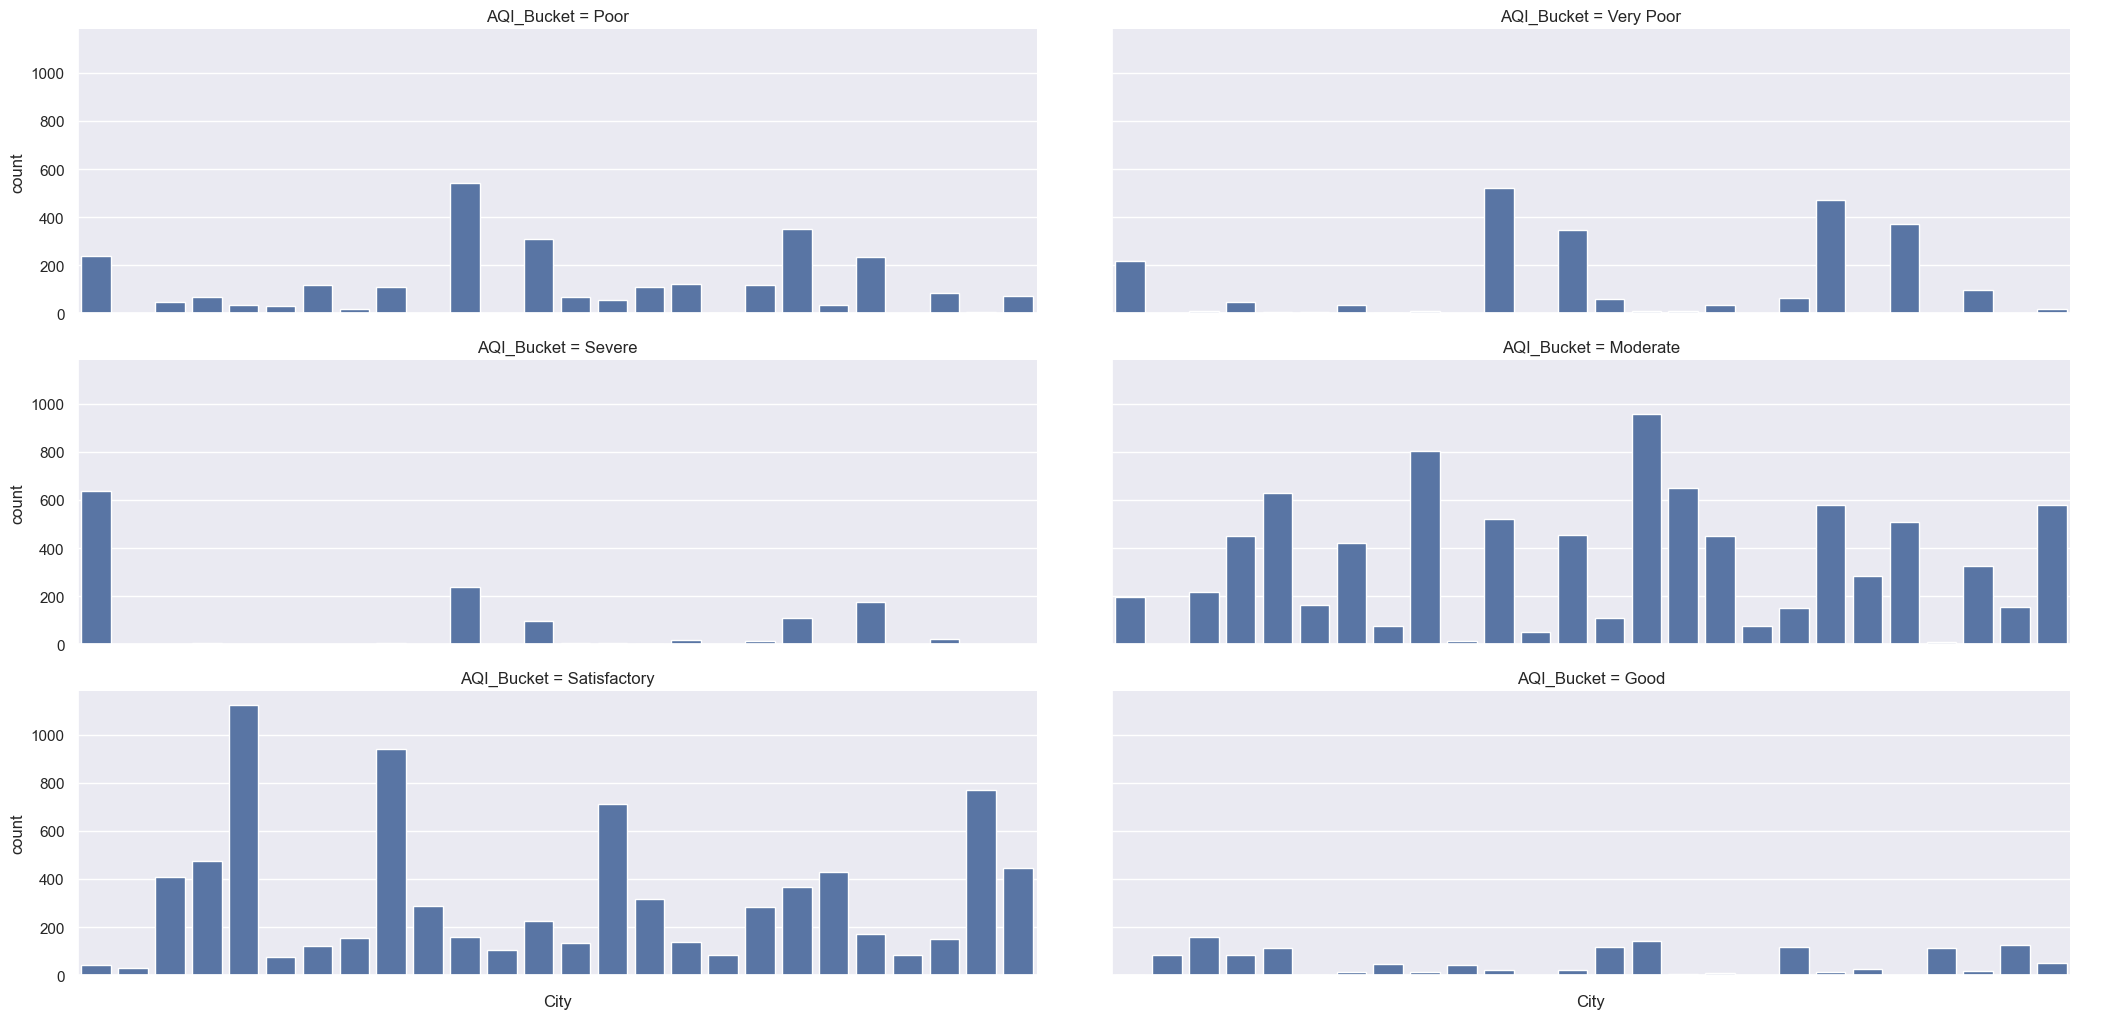

In [23]:
sns.set_theme(style="darkgrid")
graph=sns.catplot( x="City", kind='count', data=df,col="AQI_Bucket",col_wrap=2 ,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

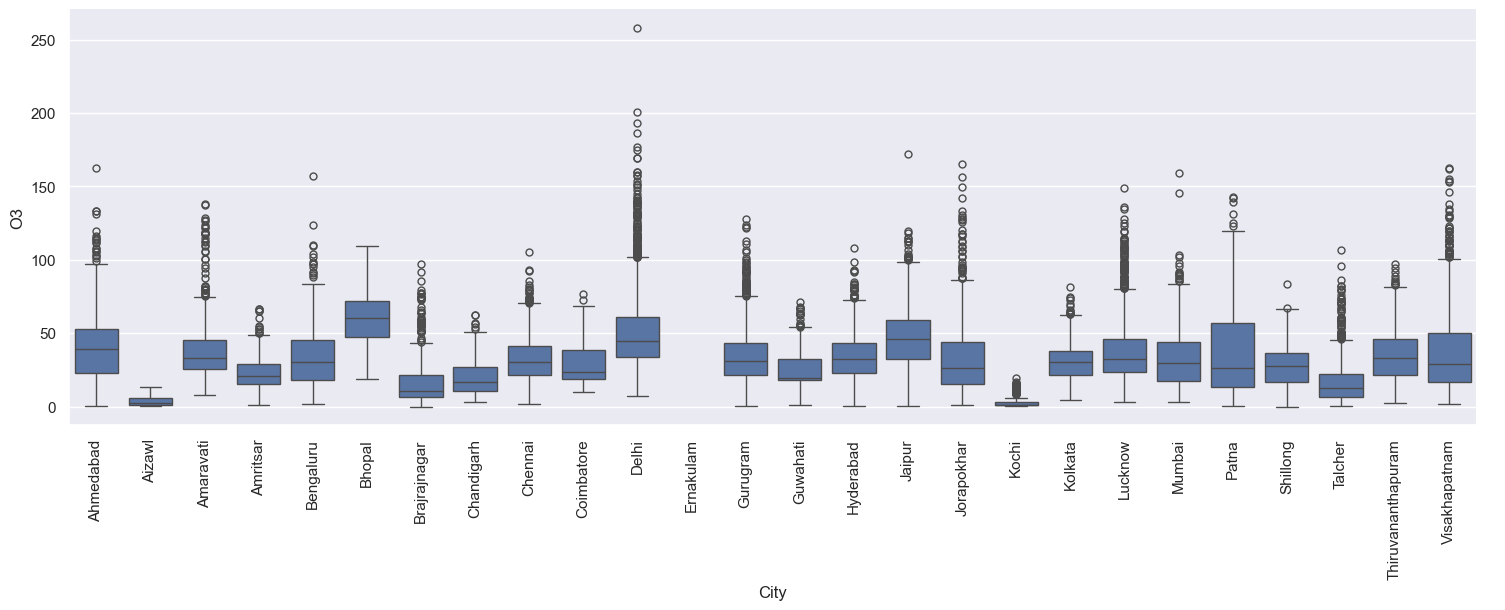

In [33]:
graph1= sns.catplot(x='City',y='O3',kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

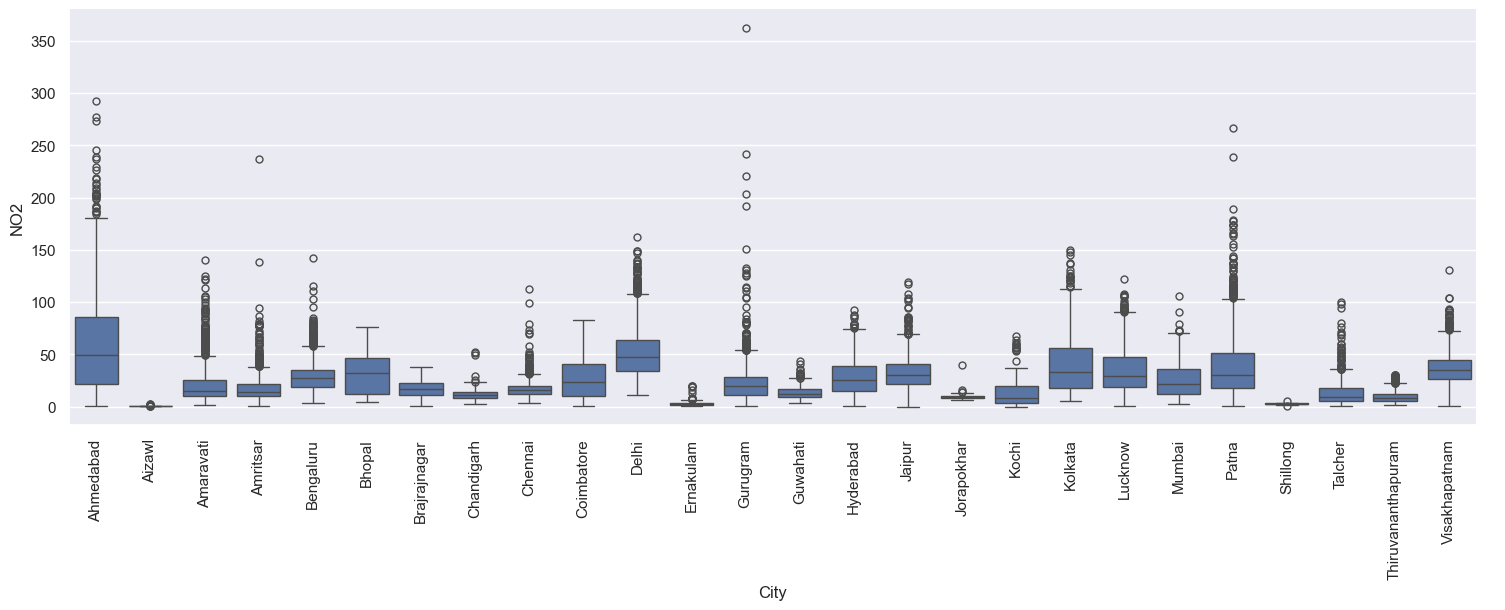

In [24]:
graph2= sns.catplot(x='City',y='NO2',kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

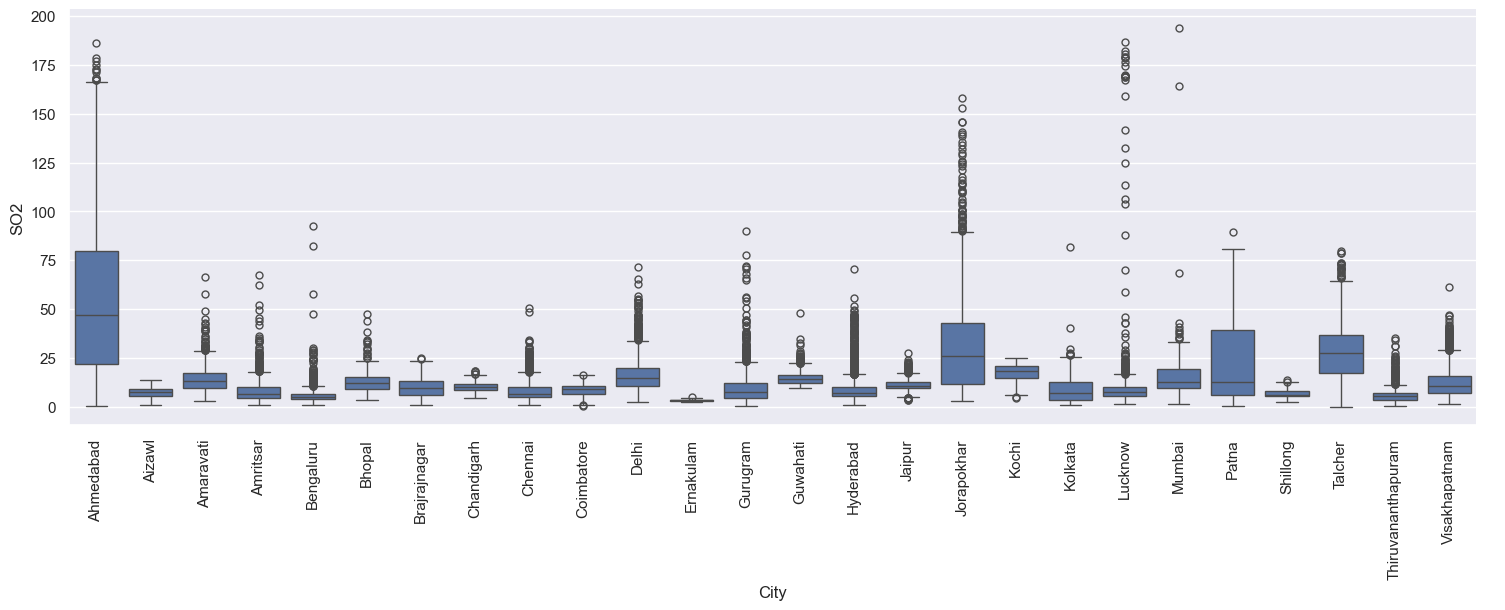

In [36]:
graph3= sns.catplot(x='City',y='SO2',kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

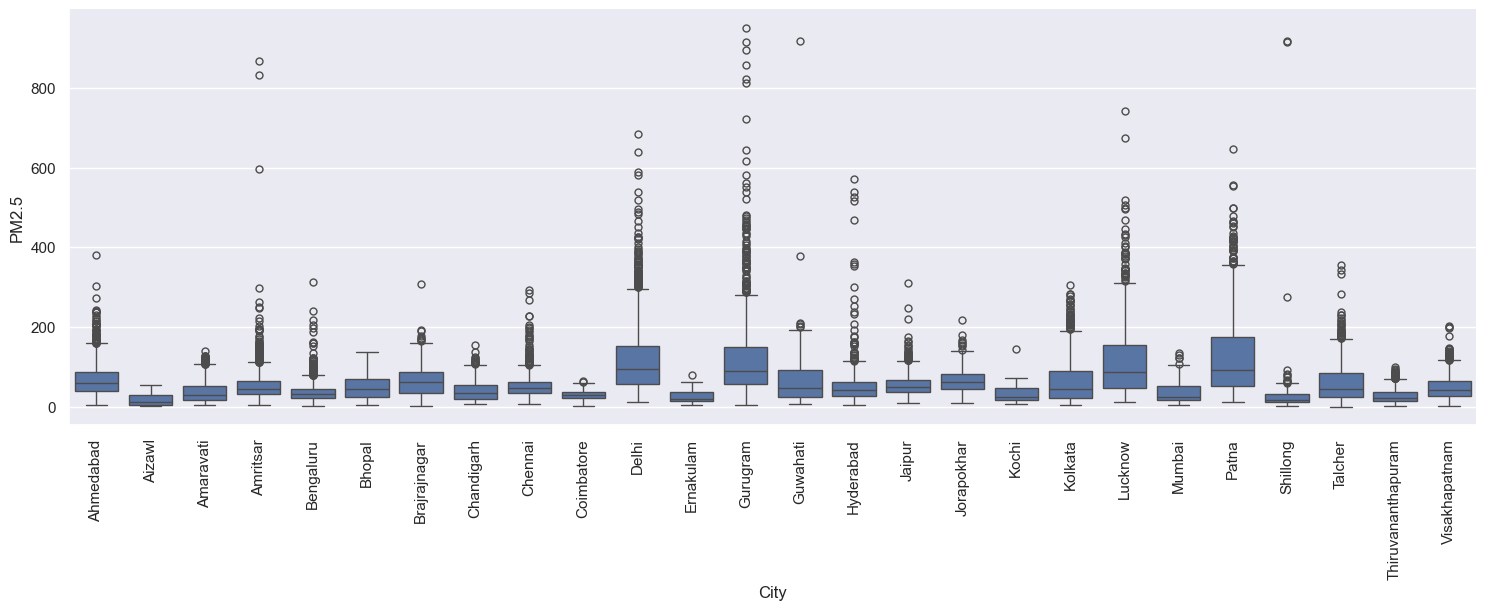

In [37]:
graph4= sns.catplot(x='City',y='PM2.5',kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

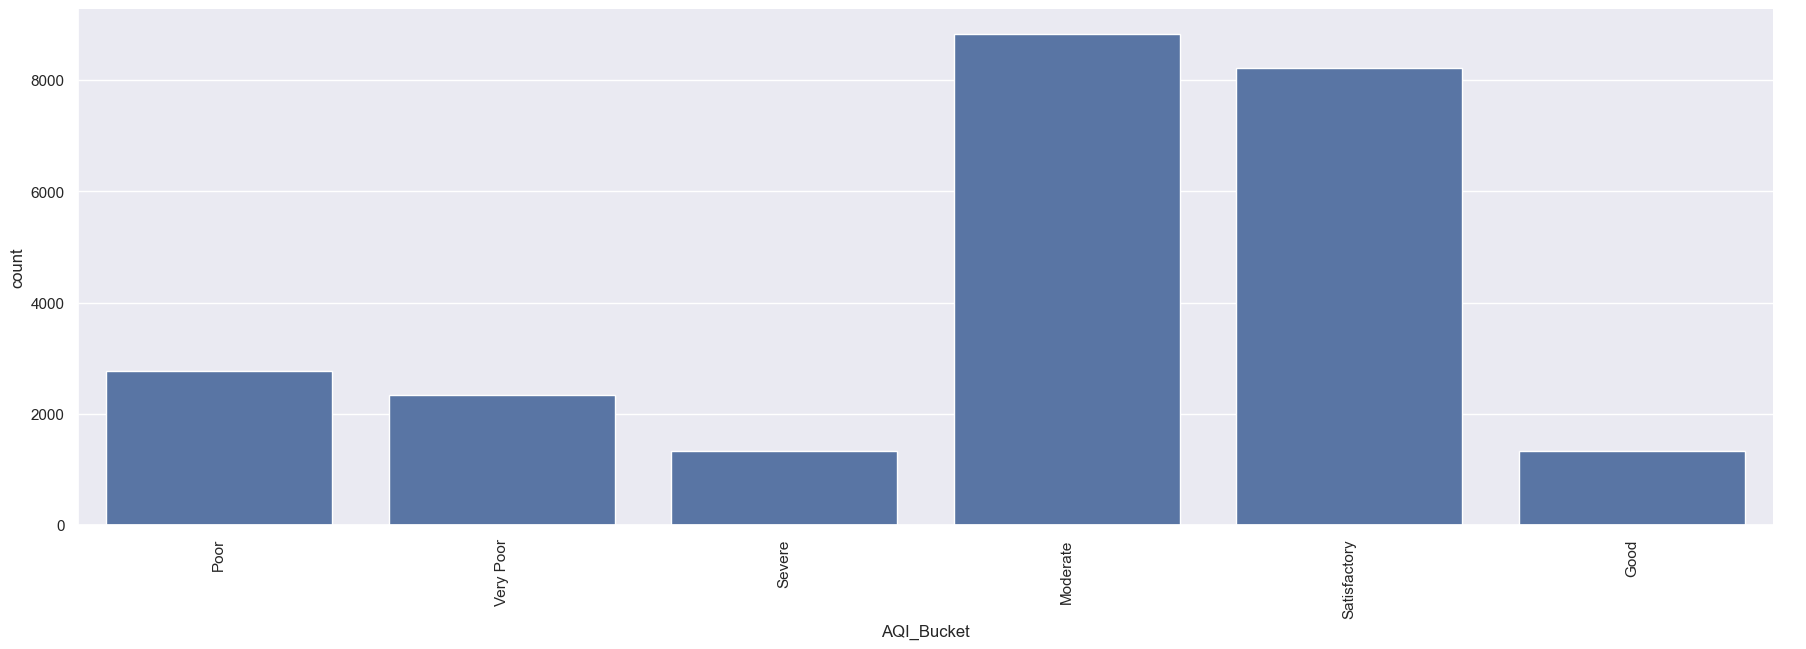

In [38]:
graph5 =sns.catplot(x='AQI_Bucket',data=df,kind='count',height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

In [39]:
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
dtype: int64

In [40]:
df.describe().loc['mean']

PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
Name: mean, dtype: float64

In [64]:
df=df.replace({
      "PM2.5":{np.nan:67.450578},
      "PM10":{np.nan: 118.127103},
      "NO":{np.nan: 17.574730},
      "NO2":{np.nan: 28.560659},
     "NOx":{np.nan: 32.309123},
     "NH3":{np.nan:  23.483476},
      "CO":{np.nan: 2.248598},
     "SO2":{np.nan: 14.531977 }, 
     "O3":{np.nan: 34.491430 },   
     "Benzene":{np.nan: 3.280840 },  
     "Toluene":{np.nan:8.700972 },     
     "Xylene":{np.nan: 3.070128} 
     
    })

In [65]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [25]:
df = df.drop(['AQI_Bucket'], axis=1)


In [26]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

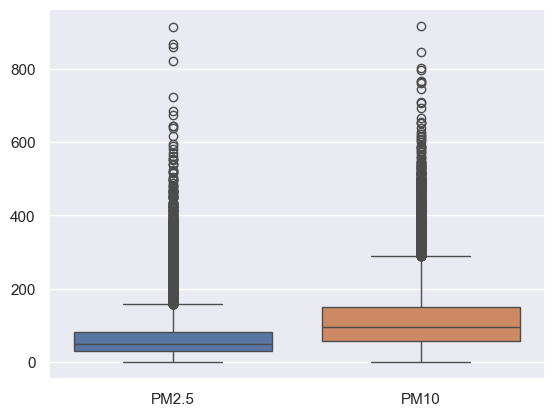

In [28]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

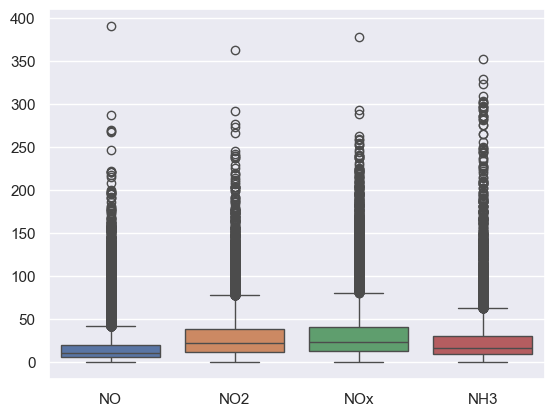

In [29]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

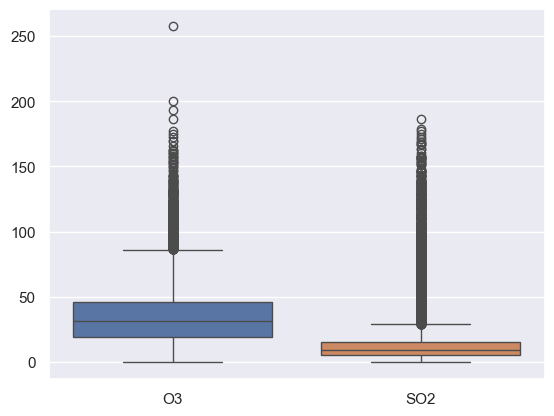

In [30]:
sns.boxplot(data=df[['O3','SO2']])

In [40]:
# IQR Method 
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
            )
    return df
        

In [42]:
df = replace_outliers(df)


In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,55.260713,32.910786,0.04,29.0000,48.785,80.921250,158.80
PM10,17764.0,105.338640,60.235533,0.03,56.7775,96.180,150.180625,289.95
NO,24463.0,12.517884,8.955014,0.03,5.6600,9.910,20.030000,41.58
NO2,24459.0,25.972275,17.006150,0.01,11.9400,22.100,38.240000,77.68
NOx,22993.0,26.756914,17.712288,0.00,13.1100,23.680,40.170000,80.72
NH3,18314.0,20.013266,13.893247,0.01,8.9600,16.310,30.360000,62.45
CO,24405.0,1.004899,0.576547,0.00,0.5900,0.930,1.480000,2.81
SO2,24245.0,10.300662,5.819469,0.01,5.7300,9.220,15.140000,29.22
O3,24043.0,33.274368,18.033165,0.01,19.2500,31.250,46.080000,86.29
Benzene,21315.0,1.859195,1.862739,0.00,0.2300,1.290,3.340000,8.00


<Axes: >

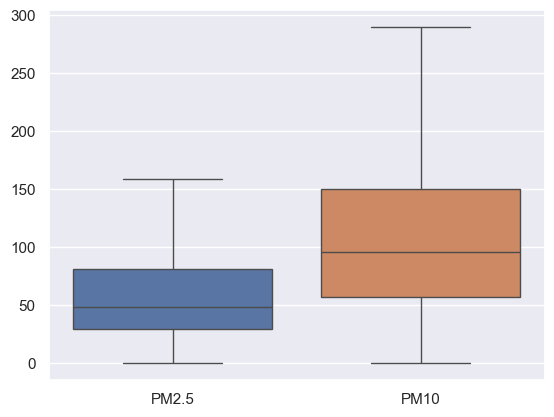

In [44]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

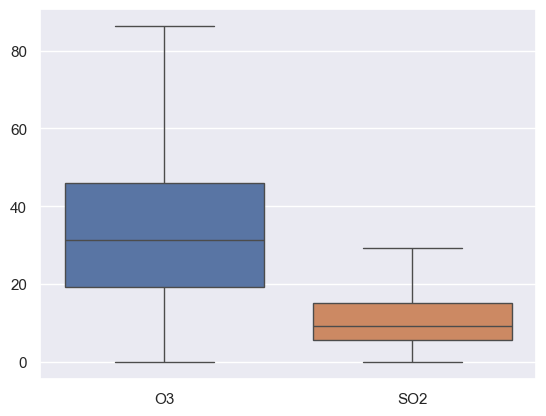

In [45]:
sns.boxplot(data=df[['O3','SO2']])

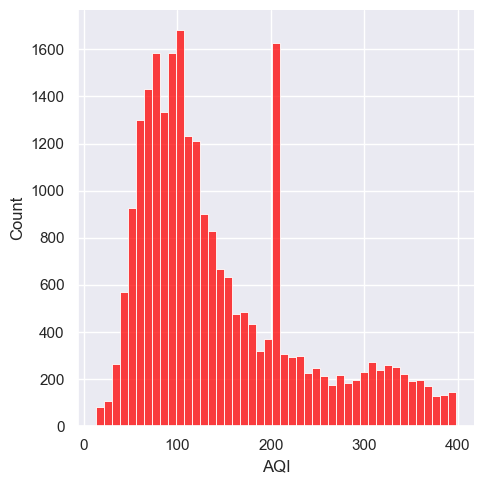

In [46]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
df1 = df.drop(columns=['City'])

In [49]:
print(df1.dtypes)

Date        object
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object


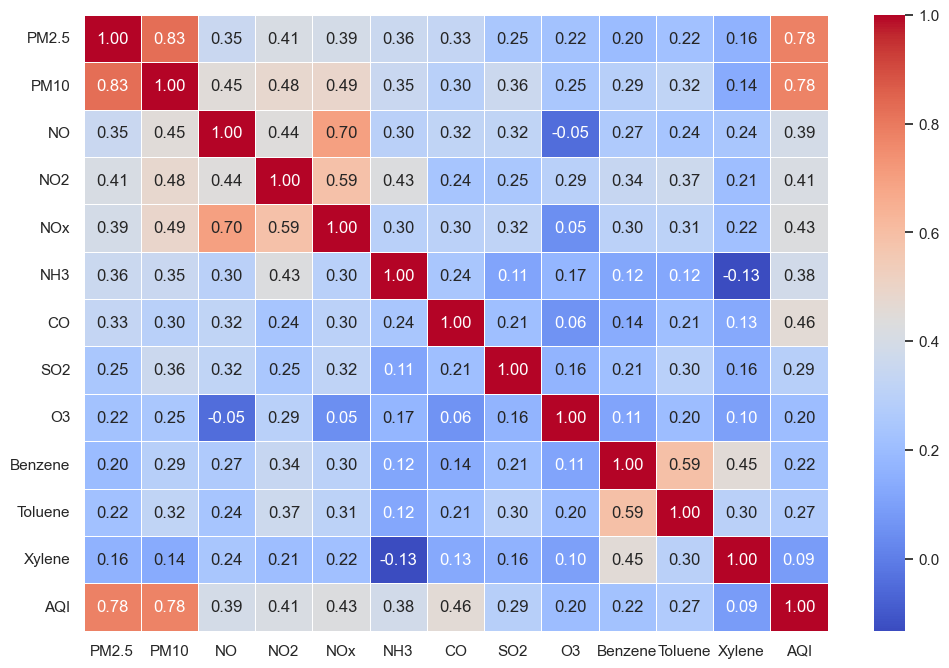

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()